## Create an HTML File of red_wine.csv dataset

In [3]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load the red-wine.csv dataset into a pandas DataFrame
file_path = 'red_wine.csv'
data = pd.read_csv(file_path)

# Create a ProfileReport object
profile = ProfileReport(data)

# Generate the HTML report
profile.to_file("red_wine_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Accuracy of Majority Class Baseline Model using 10-Fold Cross-Validation

In [25]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
file_path = "/Users/BenAbril/Desktop/IS 428/red_wine.csv"
data = pd.read_csv(file_path)

# Assuming you have a target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Identify the majority class
majority_class = y.value_counts().idxmax()

# Step 3: Create a baseline model that always predicts the majority class
def majority_class_baseline(X):
    return [majority_class] * len(X)

# Step 4: Perform 10-fold cross-validation and calculate accuracy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    baseline_predictions = majority_class_baseline(X_test)
    accuracy = accuracy_score(y_test, baseline_predictions)
    accuracy_scores.append(accuracy)

# Print accuracy scores for each fold
print(f'Accuracy scores for each fold: {accuracy_scores}')
print(f'Mean Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.2f}')


Accuracy scores for each fold: [0.5344827586206896, 0.5263157894736842, 0.5263157894736842, 0.5263157894736842, 0.5263157894736842, 0.5263157894736842, 0.5263157894736842, 0.5263157894736842, 0.5263157894736842, 0.543859649122807]
Mean Accuracy: 0.53


## AUC of Random Classifier Baseline Model using 10-Fold Cross-Validation

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Perform 10-fold cross-validation and calculate AUC
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

auc_scores = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Generate random predictions for the testing set
    random_predictions = np.random.rand(len(y_test))

    # Calculate the AUC for the random classifier
    auc = roc_auc_score(y_test, random_predictions)
    auc_scores.append(auc)

# Print AUC scores for each fold
print(f'AUC scores for each fold: {auc_scores}')
print(f'Mean AUC: {sum(auc_scores) / len(auc_scores):.2f}')


AUC scores for each fold: [0.5424133811230585, 0.4148148148148148, 0.4888888888888889, 0.42098765432098767, 0.4271604938271605, 0.5382716049382716, 0.4641975308641975, 0.5148148148148148, 0.345679012345679, 0.36724565756823824]
Mean AUC: 0.45


## Performance Metrics of Logistic Regression Model using 10-Fold Cross-Validation

In [21]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate metrics and print the results
def calculate_metrics(model, X, y, cv):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision_scorer = make_scorer(precision_score, pos_label='high')
    precision = cross_val_score(model, X, y, cv=cv, scoring=precision_scorer)
    recall_scorer = make_scorer(recall_score, pos_label='high')
    recall = cross_val_score(model, X, y, cv=cv, scoring=recall_scorer)
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    
    print(f'Accuracy: {accuracy.mean():.2f}')
    print(f'Precision: {precision.mean():.2f}')
    print(f'Recall: {recall.mean():.2f}')
    print(f'F1-score: {f1.mean():.2f}')
    
# Calculate and print the performance metrics
calculate_metrics(logistic_regression_model, X, y, cv)


Accuracy: 0.78
Precision: 0.78
Recall: 0.83
F1-score: nan


/Users/BenAbril/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/BenAbril/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Users/BenAbril/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/BenAbril/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/BenAbril/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1238, in f1_score
    ret

## AUC of Logistic Regression Model Using 10-Fold Cross-Validation Model

In [22]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate AUC and print the results
def calculate_auc(model, X, y, cv):
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    print(f'AUC scores for each fold: {auc_scores}')
    print(f'Mean AUC: {auc_scores.mean():.2f}')

# Calculate and print the AUC scores
calculate_auc(logistic_regression_model, X, y, cv)


AUC scores for each fold: [0.97729988 0.84197531 0.90493827 0.8037037  0.90493827 0.86049383
 0.90617284 0.83580247 0.84320988 0.87965261]
Mean AUC: 0.88


## Accuracy of Naive Bayes Model using 10-Fold Cross-Validation

In [28]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the Naive Bayes model (Gaussian Naive Bayes)
naive_bayes_model = GaussianNB()

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate accuracy and print the results
def calculate_accuracy(model, X, y, cv):
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    print(f'Accuracy scores for each fold: {accuracy_scores}')
    print(f'Mean Accuracy: {accuracy_scores.mean():.2f}')

# Calculate and print the accuracy scores
calculate_accuracy(naive_bayes_model, X, y, cv)


Accuracy scores for each fold: [0.87931034 0.80701754 0.87719298 0.85964912 0.8245614  0.80701754
 0.8245614  0.77192982 0.71929825 0.87719298]
Mean Accuracy: 0.82


## AUC of Naive Bayes Model Using 10-Fold Cross Validation

In [29]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the Naive Bayes model (Gaussian Naive Bayes)
naive_bayes_model = GaussianNB()

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate AUC and print the results
def calculate_auc(model, X, y, cv):
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    print(f'AUC scores for each fold: {auc_scores}')
    print(f'Mean AUC: {auc_scores.mean():.2f}')

# Calculate and print the AUC scores
calculate_auc(naive_bayes_model, X, y, cv)


AUC scores for each fold: [0.96057348 0.84691358 0.94197531 0.88024691 0.92962963 0.86049383
 0.89753086 0.86049383 0.85679012 0.89826303]
Mean AUC: 0.89


## Accuracy of Decision Tree Model Using 10-Fold Cross-Validation

In [30]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate accuracy and print the results
def calculate_accuracy(model, X, y, cv):
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    print(f'Accuracy scores for each fold: {accuracy_scores}')
    print(f'Mean Accuracy: {accuracy_scores.mean():.2f}')

# Calculate and print the accuracy scores
calculate_accuracy(decision_tree_model, X, y, cv)


Accuracy scores for each fold: [0.9137931  0.87719298 0.80701754 0.78947368 0.77192982 0.8245614
 0.75438596 0.78947368 0.73684211 0.85964912]
Mean Accuracy: 0.81


## AUC of Decision Tree Model Using 10-Fold Cross-Vaildation

In [31]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate AUC and print the results
def calculate_auc(model, X, y, cv):
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    print(f'AUC scores for each fold: {auc_scores}')
    print(f'Mean AUC: {auc_scores.mean():.2f}')

# Calculate and print the AUC scores
calculate_auc(decision_tree_model, X, y, cv)


AUC scores for each fold: [0.91218638 0.87777778 0.79074074 0.7537037  0.79259259 0.78703704
 0.76666667 0.78888889 0.73333333 0.87158809]
Mean AUC: 0.81


## Accuracy of SVM-Linear Model Using 10-Fold Cross-Validation

In [33]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the Support Vector Machine (SVM) linear model
svm_model = SVC(kernel='linear')

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate accuracy and print the results
def calculate_accuracy(model, X, y, cv):
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    print(f'Accuracy scores for each fold: {accuracy_scores}')
    print(f'Mean Accuracy: {accuracy_scores.mean():.2f}')

# Calculate and print the accuracy scores
calculate_accuracy(svm_model, X, y, cv)


Accuracy scores for each fold: [0.9137931  0.75438596 0.80701754 0.71929825 0.78947368 0.78947368
 0.78947368 0.80701754 0.73684211 0.8245614 ]
Mean Accuracy: 0.79


## AUC of SVM-Linear Model Using 10-Fold Cross-Validation

In [35]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the Support Vector Machine (SVM) linear model
svm_model = SVC(kernel='linear', probability=True)

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate AUC and print the results
def calculate_auc(model, X, y, cv):
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    print(f'AUC scores for each fold: {auc_scores}')
    print(f'Mean AUC: {auc_scores.mean():.2f}')

# Calculate and print the AUC scores
calculate_auc(svm_model, X, y, cv)


AUC scores for each fold: [0.97849462 0.84074074 0.90864198 0.80123457 0.89012346 0.86296296
 0.90493827 0.83209877 0.85308642 0.882134  ]
Mean AUC: 0.88


## Accuracy of SVM-RBF Model Using 10-Fold Cross-Validation

In [36]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the Support Vector Machine (SVM) with RBF kernel model
svm_model = SVC(kernel='rbf')

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate accuracy and print the results
def calculate_accuracy(model, X, y, cv):
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    print(f'Accuracy scores for each fold: {accuracy_scores}')
    print(f'Mean Accuracy: {accuracy_scores.mean():.2f}')

# Calculate and print the accuracy scores
calculate_accuracy(svm_model, X, y, cv)


Accuracy scores for each fold: [0.56896552 0.52631579 0.54385965 0.52631579 0.52631579 0.52631579
 0.54385965 0.52631579 0.52631579 0.54385965]
Mean Accuracy: 0.54


## AUC of SVM-RBF Model Using 10-Fold Cross-Validation

In [37]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the Support Vector Machine (SVM) with RBF kernel model
svm_model = SVC(kernel='rbf', probability=True)

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate AUC and print the results
def calculate_auc(model, X, y, cv):
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    print(f'AUC scores for each fold: {auc_scores}')
    print(f'Mean AUC: {auc_scores.mean():.2f}')

# Calculate and print the AUC scores
calculate_auc(svm_model, X, y, cv)


AUC scores for each fold: [0.9557945  0.83950617 0.91604938 0.80864198 0.81975309 0.83209877
 0.86049383 0.81358025 0.82962963 0.87468983]
Mean AUC: 0.86


## Accuracy of Random Forest Model Using 10-Fold Cross Validation

In [38]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Step 2: Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a function to calculate accuracy and print the results
def calculate_accuracy(model, X, y, cv):
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    print(f'Accuracy scores for each fold: {accuracy_scores}')
    print(f'Mean Accuracy: {accuracy_scores.mean():.2f}')

# Calculate and print the accuracy scores
calculate_accuracy(random_forest_model, X, y, cv)


Accuracy scores for each fold: [0.98275862 0.9122807  0.8245614  0.80701754 0.8245614  0.87719298
 0.77192982 0.8245614  0.73684211 0.84210526]
Mean Accuracy: 0.84


## AUC of Random Forest Model Using 10-Fold Cross Validation

In [39]:
c

# Define a function to calculate AUC and print the results
def calculate_auc(model, X, y, cv):
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    print(f'AUC scores for each fold: {auc_scores}')
    print(f'Mean AUC: {auc_scores.mean():.2f}')

# Calculate and print the AUC scores
calculate_auc(random_forest_model, X, y, cv)


AUC scores for each fold: [0.98267622 0.94197531 0.92716049 0.90617284 0.90864198 0.93703704
 0.90246914 0.90679012 0.87160494 0.89578164]
Mean AUC: 0.92


## ROC Curve of Random Forest Classifier

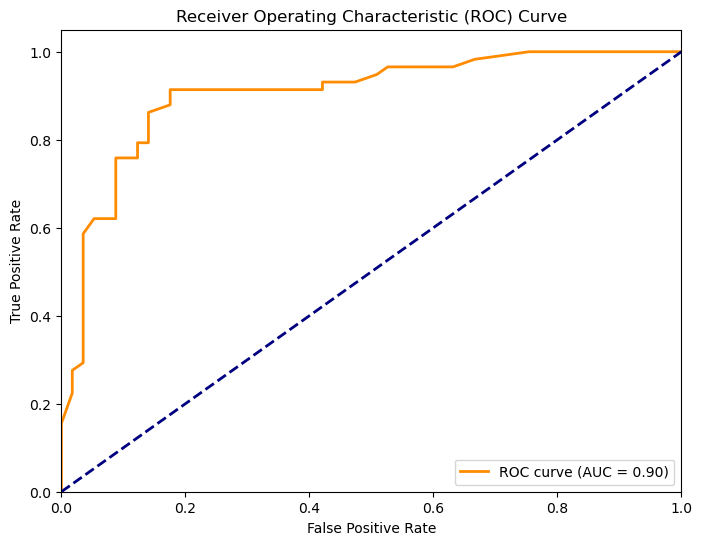

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

# Load your dataset (replace this with your actual dataset)
data = pd.read_csv(file_path)

# Assuming you have a binary target column named 'target_column_name', replace it with the actual column name.
target_column_name = 'type'
# Convert categorical labels to binary (e.g., 'high' to 1, 'low' to 0)
data[target_column_name] = (data[target_column_name] == 'high').astype(int)

# Extract features and target
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Saving the Random Forest Model used on the red_wine.csv

In [50]:
import joblib

# Train the Random Forest model (your existing code)
# random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest_model.fit(X_red, y_red)

# Save the trained model to a file
joblib.dump(random_forest_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

## Using the Random Forest Model on the white_wine.csv to calculate Performance Metrics & AUC

In [51]:
import joblib

# Train the Random Forest model (your existing code)
# random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest_model.fit(X, y)

# Save the trained model to a file
joblib.dump(random_forest_model, 'random_forest_model.pkl')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib

# Load the saved Random Forest model
random_forest_model = joblib.load('random_forest_model.pkl')

# Load the white wine dataset
new_file_path = "/Users/BenAbril/Desktop/IS 428/white_wine.csv"
white_wine_data = pd.read_csv(new_file_path)

# Assuming you have a target column named 'type' in the white wine dataset,
# replace it with the actual column name.
target_column_name = 'type'

# Extract features and target variable from the white wine dataset
X_white = white_wine_data.drop(columns=[target_column_name])

# Convert 'high' and 'low' labels to binary labels (0 and 1)
y_white = white_wine_data[target_column_name].map({'high': 1, 'low': 0})

# Use the loaded Random Forest model
# Make predictions on the white wine dataset
y_pred_white = random_forest_model.predict(X_white)

# Calculate accuracy on the white wine dataset
accuracy_white = accuracy_score(y_white, y_pred_white)
print(f'Accuracy on the White Wine dataset: {accuracy_white:.2f}')

# Calculate AUC on the white wine dataset
# If your model does not provide probabilities, you can skip this step.
y_pred_proba_white = random_forest_model.predict_proba(X_white)[:, 1]
auc_white = roc_auc_score(y_white, y_pred_proba_white)
print(f'AUC on the White Wine dataset: {auc_white:.2f}')



Accuracy on the White Wine dataset: 0.91
AUC on the White Wine dataset: 0.92
